# crime data

In [214]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import warnings 
warnings.filterwarnings("ignore")

In [215]:
crime=pd.read_csv("crime_data.csv")

In [216]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [217]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


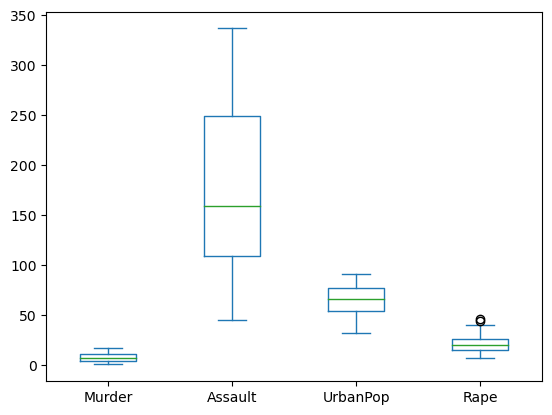

In [222]:
crime.plot(kind='box')
plt.show()


In [148]:
crime.shape

(50, 5)

# normalization

In [149]:
# Normalization function  maxmin scale
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [150]:
# Normalized data frame [ the columns are in diiferent scale and hence it is normalizd]
crime_norm = norm_func(crime.iloc[:,1:])

In [151]:
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


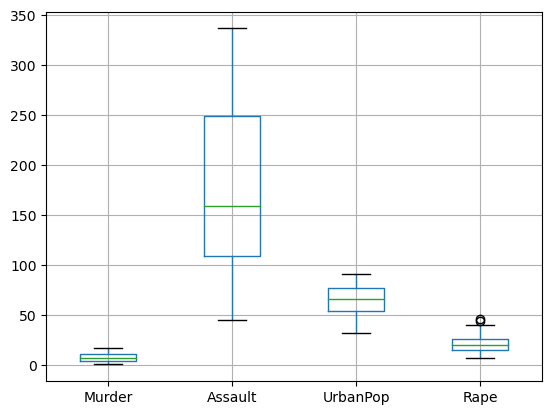

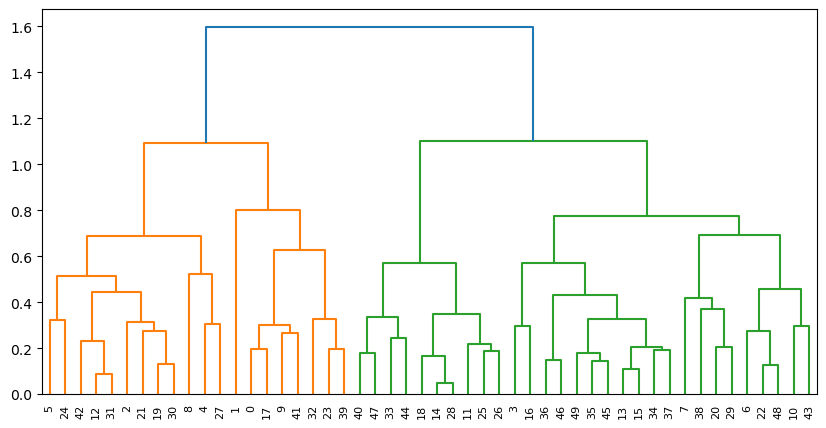

In [152]:
# create dendrogram
plt.figure(figsize=(10, 5)) 
dendrogram=sch.dendrogram(sch.linkage(crime_norm, method='complete'))
plt.show()
# here the method used for calculating the distance is complete,which is the farest neighbour

# Hierarchical clustering

In [153]:
h_crime=crime.copy()

In [154]:
h_crime_norm=crime_norm.copy()

In [155]:
# creating of the clusters by agglomerative clustering
h_cluster=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage='complete')

In [156]:
h_cluster

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [157]:
y_hc=h_cluster.fit_predict(h_crime_norm)

In [158]:
h_crime_norm["hclusterid"]=y_hc

In [159]:
h_crime_norm.head()

,Murder,Assault,UrbanPop,Rape,hclusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,3
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,3


In [160]:
h_crime_norm['hclusterid'].value_counts()

1    20
3    12
2    10
0     8
Name: hclusterid, dtype: int64

In [161]:
# addition of cluster to the data set
h_crime['hclusterid']=h_cluster.labels_

In [162]:
h_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hclusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [163]:
h_crime_norm.groupby(["hclusterid"]).agg(['mean']).reset_index()

,hclusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,0.800452,0.711473,0.364407,0.445413
1,1,0.296084,0.298973,0.657627,0.279070
2,2,0.143373,0.115411,0.293220,0.111886
3,3,0.607430,0.725742,0.785311,0.644703


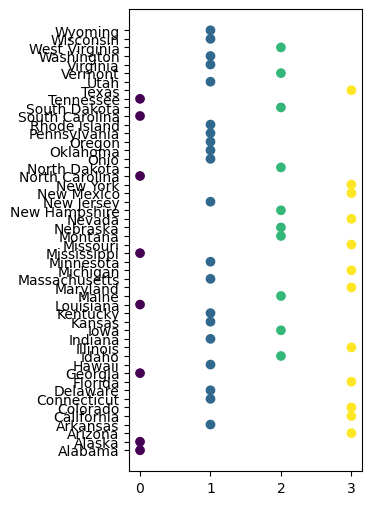

In [164]:
# Ploting of the Clusters
plt.figure(figsize=(3,6))  
plt.scatter(h_crime['hclusterid'],h_crime['Unnamed: 0'], c=h_cluster.labels_) 
plt.show()

# K-means

In [165]:
# using elbow method to find the optimum no of clusters
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

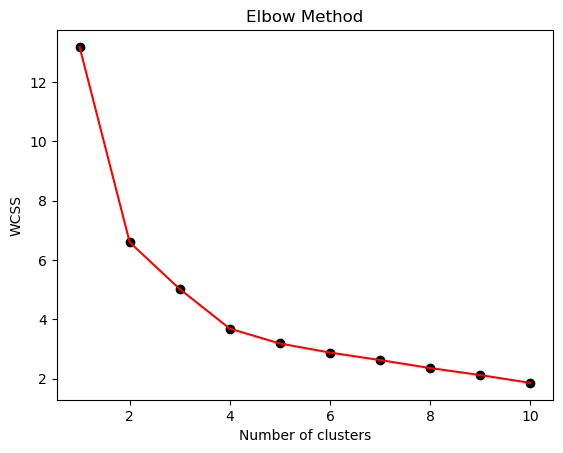

In [166]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss,color='red')
plt.scatter(range(1, 11), wcss,color='black')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [167]:
 #from this the optimum no of cluster is K=4

In [168]:
K4_crime_norm=crime_norm.copy()

In [169]:
K4_cluster=KMeans(n_clusters=4)
K4_cluster.fit(K4_crime_norm)

KMeans(n_clusters=4)

In [170]:
K4_cluster.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [171]:
K4_crime=crime.copy()

In [172]:
K4_crime['K4_clusterid']=K4_cluster.labels_

In [173]:
K4_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,K4_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


In [174]:
K4_crime.groupby(["K4_clusterid"])["Unnamed: 0"].apply(lambda x : tuple(x))

K4_clusterid
0    (Connecticut, Delaware, Hawaii, Indiana, Kansa...
1    (Alaska, Arizona, California, Colorado, Florid...
2    (Idaho, Iowa, Kentucky, Maine, Minnesota, Mont...
3    (Alabama, Arkansas, Georgia, Louisiana, Missis...
Name: Unnamed: 0, dtype: object

In [175]:
K4_crime['K4_clusterid'].value_counts()

0    16
1    13
2    13
3     8
Name: K4_clusterid, dtype: int64

In [176]:
# Computing the centroids for K=4 clusters 
K4_cluster.cluster_centers_

array([[0.29254518, 0.32148973, 0.70974576, 0.29667313],
       [0.60333642, 0.72734457, 0.74576271, 0.66905188],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [177]:
# Group data by Clusters (K=4)
K4_crime.groupby('K4_clusterid').agg(['mean']).reset_index()

,K4_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.600000,78.538462,52.076923,12.176923
3,3,13.937500,243.625000,53.750000,21.412500


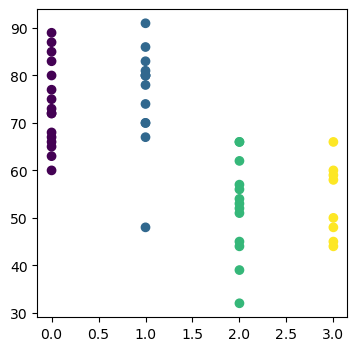

In [178]:
# Plot Clusters
plt.figure(figsize=(4, 4))  
plt.scatter(K4_crime['K4_clusterid'],K4_crime['UrbanPop'], c=K4_cluster.labels_) 
plt.show()

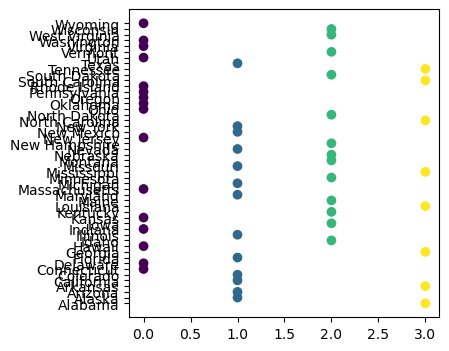

In [179]:
# Plot Clusters
plt.figure(figsize=(4, 4))  
plt.scatter(K4_crime['K4_clusterid'],K4_crime['Unnamed: 0'], c=K4_cluster.labels_) 
plt.show()

# DBSCAN

In [180]:
db_crime=crime.copy()

In [181]:
db_crime_norm=crime_norm.copy()

In [206]:

# DBSCAN Clustering
dbscan=DBSCAN(eps=0.2,min_samples=3)
dbscan.fit(db_crime_norm)

DBSCAN(eps=0.2, min_samples=3)

In [207]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0,  1, -1,  1,  0, -1, -1,  0,  0, -1,  0, -1,  1, -1, -1,  0,
        0,  0,  2,  0, -1, -1,  0, -1, -1,  2, -1,  0,  2,  0,  0,  0],
      dtype=int64)

In [208]:
# adding clusters to the dataset
db_crime['db_clusterid']=dbscan.labels_
db_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,db_clusterid
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1


In [209]:
db_crime.groupby('db_clusterid').agg(['mean']).reset_index()

,db_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,9.957692,211.076923,68.615385,24.069231
1,0,4.644444,99.222222,59.000000,14.577778
2,1,11.600000,280.000000,70.333333,31.666667
3,2,4.033333,141.333333,73.333333,26.133333


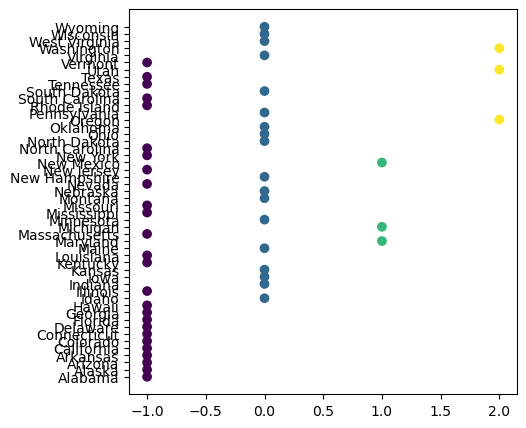

In [210]:
# Plot Clusters
plt.figure(figsize=(5, 5))  
plt.scatter(db_crime['db_clusterid'],db_crime['Unnamed: 0'], c=dbscan.labels_) 
plt.show()

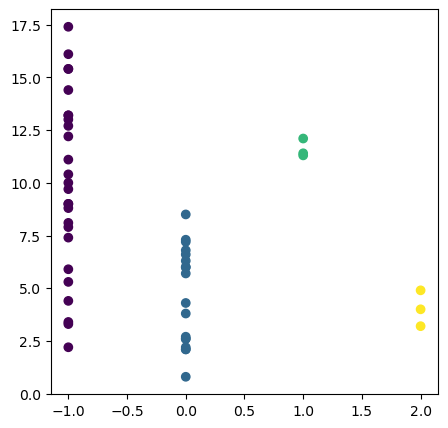

In [211]:
# Plot Clusters
plt.figure(figsize=(5, 5))  
plt.scatter(db_crime['db_clusterid'],db_crime['Murder'], c=dbscan.labels_) 
plt.show()